### Interactive Geo-Spatial Visualization

In [101]:
import pandas as pd
import folium

In [205]:
data = pd.read_csv('../data/combined_data.csv')

In [206]:
#Folium template
m = folium.Map(location=[0, 0], zoom_start=2)
folium.TileLayer('Cartodb Positron').add_to(m)

# Folium customizations
for _, row in data.iterrows():
    energy = row['Calculated Total Impact Energy (kt)']
    color = 'teal'
    radius = 5

    if energy < 1:
        color = 'blue'
        radius = 3
    elif 5 < energy <= 10:
        color = 'yellow'
        radius = 8
    elif 10 <= energy <= 400:
        color = 'orange'
        radius = 14
    elif energy > 400:
        color = 'red'
        radius = 25

    if row['Latitude (deg.)'] == 54.8 and row['Longitude (deg.)'] == 61.1:
        name = "Chelyabinsk Impactor (Super Bolide)"
    else:
        name = 'Bolide Event'

    if name:
        popup_content = f"<strong>{name}</strong><br>"
    else:
        popup_content = ""

    popup_content += f"Impact Energy: {row['Calculated Total Impact Energy (kt)']} kt<br>" \
                 f"Date: {row['Peak Brightness Date/Time (UT)']} UT<br>" \
                 f"Latitude: {row['Latitude (deg.)']}°<br>" \
                 f"Longitude: {row['Longitude (deg.)']}°"

    popup = folium.Popup(popup_content, max_width=600)

    folium.CircleMarker(
        location=(row['Latitude (deg.)'], row['Longitude (deg.)']),
        radius=radius,
        color='white',
        weight=1,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup
    ).add_to(m)

# Gradient legend interactive
gradient_legend_html = '''
<div id="log-legend" style="
    position: fixed;
    bottom: 50px; left: 310px; width: 350px; height: 100px;
    background-color: white; border: 2px solid grey; z-index: 9999;
    padding: 10px; box-shadow: 3px 3px 5px grey; text-align: center; border-radius: 5px;">
    <div style="font-weight: bold; font-size: 16px; margin-bottom: 5px;">
        Impact Energy log(kt)
    </div>
    <div style="position: relative; width: 300px; margin: 0 auto; display: flex;">
        <div id="blue-segment" style="
            flex: 1; height: 20px; background: blue; cursor: pointer;"></div>
        <div id="teal-segment" style="
            flex: 1; height: 20px; background: teal; cursor: pointer;"></div>
        <div id="yellow-segment" style="
            flex: 1; height: 20px; background: yellow; cursor: pointer;"></div>
        <div id="orange-segment" style="
            flex: 1; height: 20px; background: orange; cursor: pointer;"></div>
        <div id="red-segment" style="
            flex: 1; height: 20px; background: red; cursor: pointer;"></div>
    </div>
    <div style="display: flex; justify-content: space-between; font-size: 12px; margin-top: 5px;">
        <span>-1.0</span>
        <span>+0.0</span>
        <span>+0.5</span>
        <span>+1.0</span>
        <span>+1.5</span>
        <span>+2.0</span>
        <span>+2.5</span>
    </div>
</div>

<script>
// Function to highlight specific circles by category
function highlightCirclesByColor(color) {
    const circles = document.querySelectorAll('.leaflet-interactive');
    circles.forEach(circle => {
        const circleColor = circle.getAttribute('fill');
        if (circleColor === color) {
            const currentRadius = parseFloat(circle.getAttribute('r')); // Get current radius
            circle.setAttribute('r', currentRadius + 3); // Increase radius
            circle.setAttribute('stroke', 'black'); // Add black border
            circle.setAttribute('stroke-width', '1');
            circle.setAttribute('fill-opacity', '0.8'); // Increase opacity
        }
    });
}

// Function to reset all circle highlights
// Function to reset all circle highlights
function resetCircleHighlights() {
    const circles = document.querySelectorAll('.leaflet-interactive');
    circles.forEach(circle => {
        const currentRadius = parseFloat(circle.getAttribute('r')); // Get current radius
        circle.setAttribute('r', currentRadius - 3); // Reset radius
        circle.setAttribute('stroke', 'white'); // Reset border color to white
        circle.setAttribute('stroke-width', '1'); // Reset border width
        circle.setAttribute('fill-opacity', '0.6'); // Reset opacity
    });
}

// Add hover event listeners for each gradient segment
document.getElementById('blue-segment').addEventListener('mouseenter', () => {
    resetCircleHighlights();
    highlightCirclesByColor('blue');
});
document.getElementById('teal-segment').addEventListener('mouseenter', () => {
    resetCircleHighlights();
    highlightCirclesByColor('teal');
});
document.getElementById('yellow-segment').addEventListener('mouseenter', () => {
    resetCircleHighlights();
    highlightCirclesByColor('yellow');
});
document.getElementById('orange-segment').addEventListener('mouseenter', () => {
    resetCircleHighlights();
    highlightCirclesByColor('orange');
});
document.getElementById('red-segment').addEventListener('mouseenter', () => {
    resetCircleHighlights();
    highlightCirclesByColor('red');
});

// Reset highlights when leaving the gradient
document.getElementById('log-legend').addEventListener('mouseleave', resetCircleHighlights);
</script>
'''

# Title html element
title_html = '''
<div style="position: fixed;
            top: 10px; left: 50%; transform: translateX(-50%);
            width: auto; height: auto;
            background-color: white; padding: 10px;
            border: 2px solid grey; border-radius: 5px;
            font-size: 18px; font-weight: bold; z-index: 9999;
            box-shadow: 3px 3px 5px grey;">
    Geo-Spatial Meteor Impact Map
</div>
'''

# Legend + info
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 250px; height: auto;
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; box-shadow: 3px 3px 5px grey;">
    <strong>Legend</strong>
    <div style="margin-top: 5px; cursor: pointer;" onclick="toggleLegend()">
        <span id="legend-caret" style="display: inline-block; transform: rotate(0deg); transition: transform 0.2s;">▶</span> Show Legend
    </div>
    <div id="legend-content" style="display: none; margin-top: 10px;">
        <div>
            <strong>Impact Energy</strong>
            <br>
            <i style="background: blue; width: 10px; height: 10px; display: inline-block;"></i> ≤ 6 kt<br>
            <i style="background: teal; width: 10px; height: 10px; display: inline-block;"></i> > 6 kt<br>
            <i style="background: yellow; width: 10px; height: 10px; display: inline-block;"></i> > 100 kt<br>
            <i style="background: orange; width: 10px; height: 10px; display: inline-block;"></i> > 200 kt<br>
            <i style="background: red; width: 10px; height: 10px; display: inline-block;"></i> > 400 kt
            <div style="margin-top: 10px; cursor: pointer;" onclick="toggleInfo()">
                <span id="info-caret" style="display: inline-block; transform: rotate(0deg); transition: transform 0.2s;">▶</span> More Info
            </div>
            <div id="info-content" style="display: none; margin-top: 5px; font-size: 12px; color: grey;">
                Refers to total energy in kt (1 kilo ton is equivalent to 1000 tons of TNT)
                calculated from total optical energy kt (Eo).
            </div>
        </div>
    </div>
</div>

<script>
function toggleLegend() {
    var legendContent = document.getElementById('legend-content');
    var legendCaret = document.getElementById('legend-caret');
    if (legendContent.style.display === 'none') {
        legendContent.style.display = 'block';
        legendCaret.style.transform = 'rotate(90deg)';
    } else {
        legendContent.style.display = 'none';
        legendCaret.style.transform = 'rotate(0deg)';
    }
}

function toggleInfo() {
    var infoContent = document.getElementById('info-content');
    var infoCaret = document.getElementById('info-caret');
    if (infoContent.style.display === 'none') {
        infoContent.style.display = 'block';
        infoCaret.style.transform = 'rotate(90deg)';
    } else {
        infoContent.style.display = 'none';
        infoCaret.style.transform = 'rotate(0deg)';
    }
}
</script>
'''

m.get_root().html.add_child(folium.Element(legend_html))
m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(gradient_legend_html))

m.save('./visualizations/impact_heatmap_with_legend.html')

In [ ]:
from IPython.display import IFrame

file_path = '../visualizations/html/impact_heatmap_with_legend.html'

IFrame(file_path, width=1000, height=600)

### Scatter Plot of Energy Release vs. Altitude of Atmospheric Entry Events

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

data = pd.read_csv('../data/filtered_data.csv')

In [5]:

data['Size Scale'] = (data['Calculated Total Impact Energy (kt)'] - data['Calculated Total Impact Energy (kt)'].min()) / (
    data['Calculated Total Impact Energy (kt)'].max() - data['Calculated Total Impact Energy (kt)'].min())

low_energy_data = data[data['Calculated Total Impact Energy (kt)'] < 1]

# Ellipse parameters with scaling
center_x = low_energy_data['Calculated Total Impact Energy (kt)'].mean()
center_y = low_energy_data['Altitude (km)'].mean()
width = max(1, low_energy_data['Calculated Total Impact Energy (kt)'].std() * 8)
height = max(20, low_energy_data['Altitude (km)'].std() * 8)
theta = np.linspace(0, 2 * np.pi, 90)
ellipse_x = center_x + (width / 2) * np.cos(theta)
ellipse_y = center_y + (height / 2) * np.sin(theta)
ellipse_path = "M " + " L ".join([f"{x},{y}" for x, y in zip(ellipse_x, ellipse_y)]) + " Z"

# scatter p
scatter_fig = px.scatter(
    data,
    x="Calculated Total Impact Energy (kt)",  # X-axis: Impact energy
    y="Altitude (km)",  # Y-axis: Altitude
    size="Velocity (km/s)",  # Point size
    color="Size Scale",  # Color scale
    color_continuous_scale="Viridis",
    size_max=10,
    hover_data={
        "Altitude (km)": True,
        "Calculated Total Impact Energy (kt)": True,
        "Velocity (km/s)": True,
        "Size Scale": False,
    },
    title="Impact Energy vs. Altitude of Atmospheric Entry Events"
)

scatter_fig.add_shape(
    type="path",
    path=ellipse_path,
    line=dict(color="yellow", width=3),
    opacity=0.5
)

scatter_fig.update_layout(
    height=1000,
    width=1200,
    xaxis=dict(title="Calculated Total Impact Energy (kt)", gridcolor="lightgray"),
    yaxis=dict(title="Altitude (km)", gridcolor="lightgray"),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white"),
)

# Generate HTML for the plot
fig_html = scatter_fig.to_html(full_html=False, include_plotlyjs="cdn")
scatter_fig.write_image('../visualizations/impact_energy_scatterplot.png', width=2400, height=1600)
scatter_fig.show()


In [54]:
output_file = "../visualizations/html/impact_energy_scatterplot.html"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(fig_html)

print(f"Plot exported to: {output_file}")

Plot exported to: ./visualizations/impact_energy_scatterplot.html


### Temporal Distribution of Fireball and Bolide Events by M/Y

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mpld3
data = pd.read_csv('../data/filtered_data.csv')

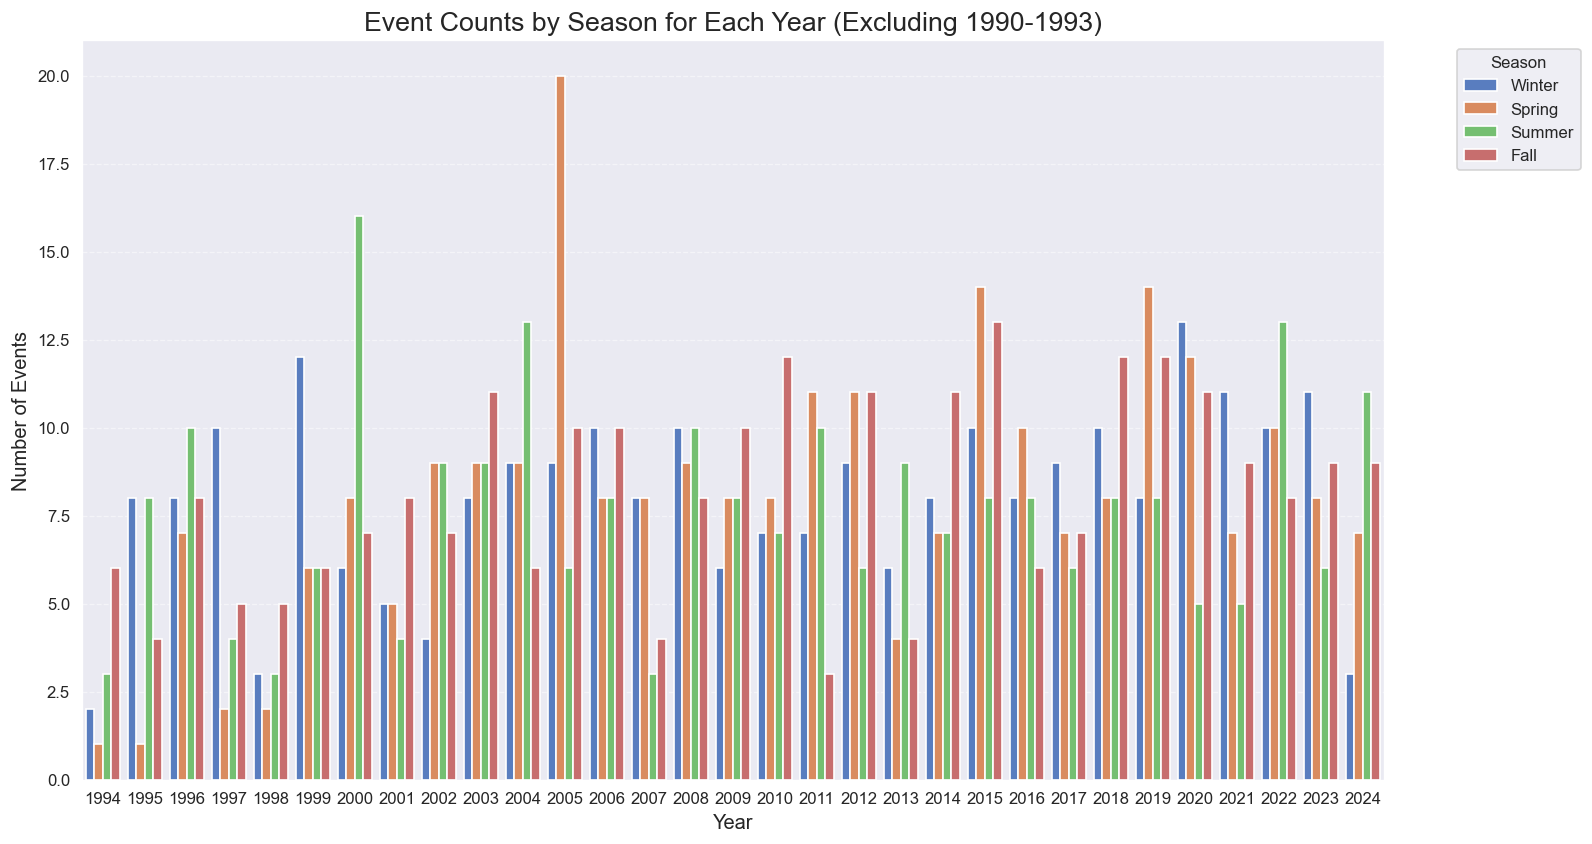

In [111]:
data['Date'] = pd.to_datetime(data['Peak Brightness Date/Time (UT)'], errors='coerce')

# Defining seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Extract Year, Month, and Season
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Season'] = data['Month'].apply(get_season)

# Filtering out years 1990 to 1993 because they have almost no data. Not for our desired audience...
data = data[~data['Year'].isin([1990, 1991, 1992, 1993])]

# Group data by Year and Season
grouped_data = data.groupby(['Year', 'Season']).agg(
    EventCount=('Calculated Total Impact Energy (kt)', 'count')
).reset_index()

all_years = np.arange(grouped_data['Year'].min(), grouped_data['Year'].max() + 1)
all_seasons = ['Winter', 'Spring', 'Summer', 'Fall']
full_index = pd.MultiIndex.from_product([all_years, all_seasons], names=['Year', 'Season'])

grouped_data = grouped_data.set_index(['Year', 'Season']).reindex(full_index).reset_index()

grouped_data['EventCount'] = grouped_data['EventCount'].fillna(0)

# bar chart
fig, ax = plt.subplots(figsize=(14, 8), dpi=120)
sns.barplot(
    data=grouped_data,
    x='Year',
    y='EventCount',
    hue='Season',
    palette='muted',
    ax=ax
)

ax.set_ylabel('Number of Events', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Event Counts by Season for Each Year (Excluding 1990-1993)', fontsize=16)
ax.legend(title='Season', loc='upper left', bbox_to_anchor=(1.05, 1))
ax.grid(axis='y', linestyle='--', alpha=0.5)


html_path = '../visualizations/html/yearly_seasonal_bar_chart_filtered.html'
with open(html_path, 'w') as f:
    f.write(mpld3.fig_to_html(fig))

plt.show()

In [112]:
png_path = '../visualizations/png/yearly_seasonal_bar_chart_filtered.png'
fig.savefig(png_path, dpi=300, bbox_inches='tight')